# Estadisiticas conjunto de depresión 2019

In [1]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [2]:
repo_dir="D:/v1ktop/Drive-INAOE/Code/data_aumentation_for_author_profiling/"
#'/content/drive/My Drive/REPOS/augmentation_ap/'

In [3]:
 %load_ext autoreload

In [4]:
 %autoreload 2

In [5]:
import sys
sys.path.append(repo_dir)

In [9]:
from word_level_da.preprocessing.load_data import Dataset

In [10]:
#localdir="/content/drive/My Drive/DATA/erisk/2017/train/"
localdir="D:/corpus/DepresionEriskCollections/2019/train/"

In [11]:
folder_name="prep_chunks"
truths_name="golden_truth.txt"
data_key="depresion19_local"

In [12]:
data= Dataset(key=data_key,  doc_len=64, min_len=int(64/2), chunking=False,  remove_end=False)

D:\v1ktop\Drive-INAOE\Code\data_aumentation_for_author_profiling\word_level_da\


In [13]:
training=data.get_dataset(folder_name=folder_name, truth_name=truths_name, 
                          partition="training")

In [14]:
len(training)

4

In [15]:
len(training[0])

820

In [16]:
len(training[1])

820

# Corpus Statistics

### Numero de documentos entrenamiento.

In [18]:
from word_level_da.classifier.explore_data import explore_data

In [19]:
exp_cls=explore_data(training[0],training[1],plot_dir=localdir)

In [20]:
type(training[1][0])

numpy.int32

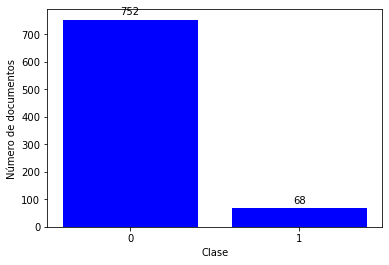

In [21]:
exp_cls.plot_class_distribution()

### Numero de sub-documentos entrenamiento.

In [22]:
data.chunking=True
training_chunks=data.get_dataset(folder_name=folder_name, truth_name=truths_name, 
                          partition="training")

In [23]:
exp_cls=explore_data(training_chunks[0],training_chunks[1],plot_dir=localdir)

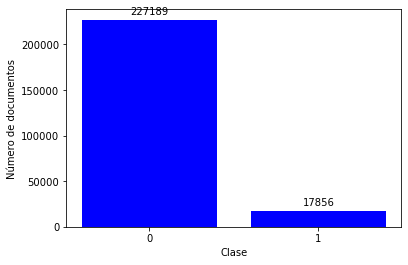

In [24]:
exp_cls.plot_class_distribution()

## Tamaño del vocabulario

In [30]:
from word_level_da.classifier.feature_extraction import FeatureExtraction

In [32]:
extractor=FeatureExtraction(docs_train=training[0], method="count")
vocab=extractor.cv.vocabulary_

In [33]:
len(vocab)

198911

### Documentos de evaluación

In [34]:
eval_data=data.get_dataset(folder_name=folder_name, truth_name=truths_name, 
                          partition="test")

In [36]:
len(eval_data[0][0])

361

In [39]:
exp_cls=explore_data(eval_data[0],eval_data[1],plot_dir=localdir)

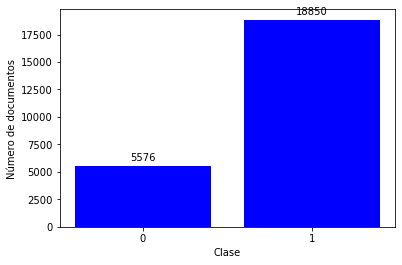

In [40]:
exp_cls.plot_class_distribution()